In [31]:
from openslide import OpenSlide
from openslide.deepzoom import DeepZoomGenerator

In [32]:
# select path to your file
wsi_filepath = ""

slide = OpenSlide(wsi_filepath)

In [33]:
# check if metadata can be loaded
def slide_info(slide):
    print("Level count: %d" % slide.level_count)
    print("Level dimensions: " + str(slide.level_dimensions))
    print("Level downsamples: " + str(slide.level_downsamples))
    print("Dimensions: " + str(slide.dimensions))
    if "openslide.mpp-x" in slide.properties:
        slide_mpp = float(slide.properties.get("openslide.mpp-x"))
        print(f"MPP: {slide_mpp}")
    else:
        print("MPP not defined in metadata!")
    if "openslide.objective-power" in slide.properties:
        slide_mag = float(slide.properties.get("openslide.objective-power"))
        print(f"Magnification: {slide_mag}")
    else:
        print("Magnification not defined in metadata!")
    print("Associated images:")
    for ai_key in slide.associated_images.keys():
      print("  " + str(ai_key) + ": " + str(slide.associated_images.get(ai_key)))
    print("Properties:")
    for prop_key in slide.properties.keys():
        print("  Property: " + str(prop_key) + ", value: " + str(slide.properties.get(prop_key)))

slide_info(slide)

Level count: 9
Level dimensions: ((67072, 149760), (33536, 74880), (16768, 37440), (8384, 18720), (4192, 9360), (2096, 4680), (1048, 2340), (524, 1170), (262, 585))
Level downsamples: (1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0)
Dimensions: (67072, 149760)
MPP: 0.24253271610020277
Magnification not defined in metadata!
Associated images:
Properties:
  Property: openslide.comment, value: 
67072x149760 (256x256) JPEG/RGB Q=80|Date = 08/01/2024|Time = 08:48:55|MPP = 0.242591|3dh_PixelSizeX = 0.242535|3dh_PixelSizeY = 0.242647|3dh_Filter = Default|3dh_Profile = Default 20x sRGB|3dh_ScannerHardwareID = P100021B2201
  Property: openslide.level-count, value: 9
  Property: openslide.level[0].downsample, value: 1
  Property: openslide.level[0].height, value: 149760
  Property: openslide.level[0].tile-height, value: 1024
  Property: openslide.level[0].tile-width, value: 1024
  Property: openslide.level[0].width, value: 67072
  Property: openslide.level[1].downsample, value: 2
  Property:

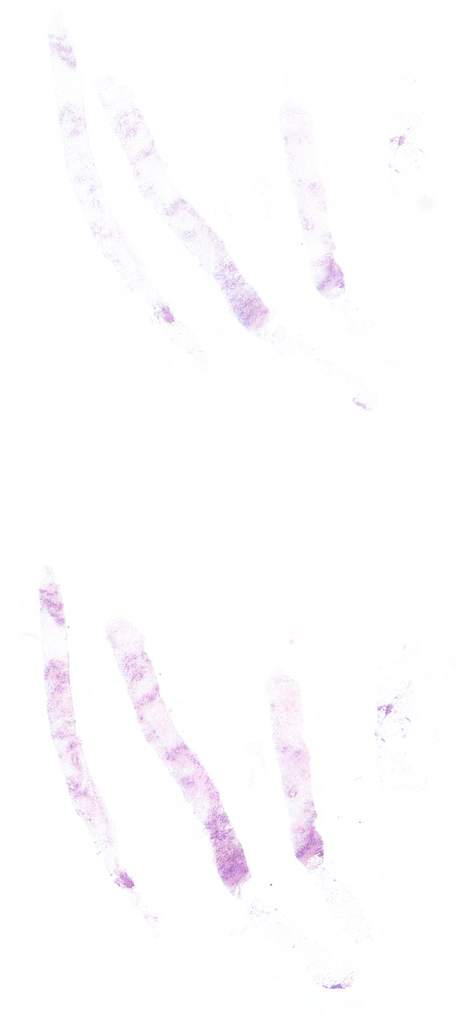

In [36]:
# Check if thumbnail can be generated
thumbnail = slide.get_thumbnail((1024, 1024))
thumbnail